In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import glob

In [77]:
# Loading the images
# Get the current working directory
baseFolder = os.getcwd()

# Select the path that contains the photos
#folder = os.path.join(baseFolder, "photos","calibration")
folder = os.path.join(baseFolder,"photos","lines")
image_name = "2.png"
image_path = os.path.join(folder, image_name)
image = cv.imread(image_path, 0)

print(f"Tipo de dato (dtype): {image.dtype}")
print(f"Valor mínimo: {np.min(image)}")
print(f"Valor máximo: {np.max(image)}")

Tipo de dato (dtype): uint8
Valor mínimo: 27
Valor máximo: 255


# Calibration Parameters

In [78]:
# We load the camera calibration results (We took the photos with the first camera setup)
cameraParameters = np.load(baseFolder + "/calibration/camera_setup1.npz")

# We extract the camera matrix and distortion coefficients, through the keys in the dictionary
mtx = cameraParameters['mtx']
dist = cameraParameters['dist']

Undistorting Image

(np.float64(-0.5), np.float64(1921.5), np.float64(1201.5), np.float64(-0.5))

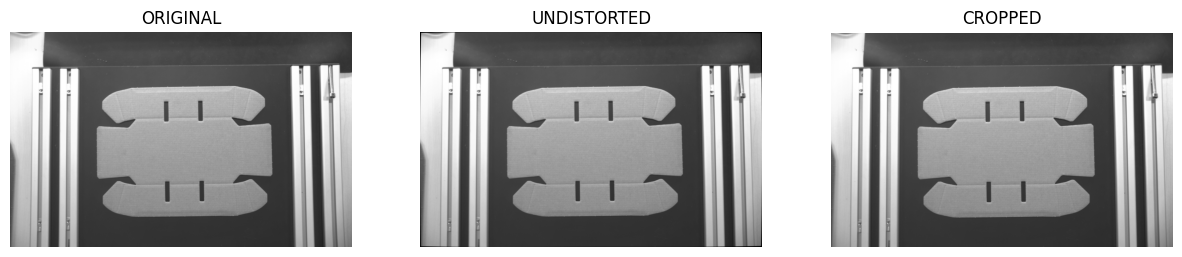

In [79]:
# We find the dimensions of the image
h, w = image.shape[:2]

# We find the new camera matrix and interested region
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# We undistort the image
udst_img = cv.undistort(image, mtx, dist, None, newcameramtx)

# We crop the image using the ROI
x_r, y_r, w_r, h_r = roi
udst_crop_img = udst_img[y_r:y_r+h_r, x_r:x_r+w_r]

# We show the images
plt.figure(figsize=(15, 10))

plt.subplot(1,3,1)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title("ORIGINAL")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(udst_img, cmap="gray", vmin=0, vmax=255)
plt.title("UNDISTORTED")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(udst_crop_img, cmap="gray", vmin=0, vmax=255)
plt.title("CROPPED")
plt.axis("off")

# Preprocesamiento

In [80]:
# Convertir de BGR (formato de OpenCV) a RGB para visualización
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Paso 1: Convertir a escala de grises
#gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Paso 2: Aplicar desenfoque Gaussiano para reducir ruido
blurred = cv.GaussianBlur(image, (5, 5), 0)

(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

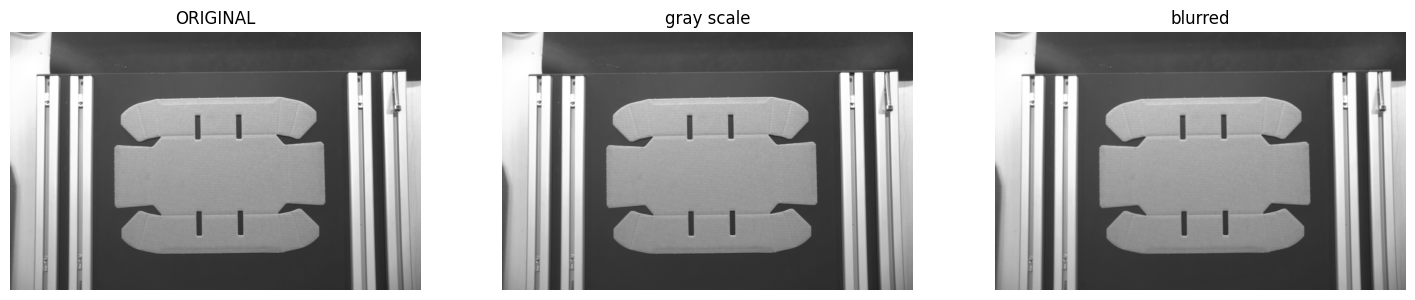

In [81]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt.imshow(image_rgb, vmin=0, vmax=255)
plt.title("ORIGINAL")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(image, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("gray scale")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blurred, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("blurred")
plt.axis("off")

# Threshold

In [82]:
# THRESHOLD
thValue = 110
_ , thBIN = cv.threshold(blurred,thValue,255,cv.THRESH_BINARY)
_ , thBININV = cv.threshold(blurred,thValue,255,cv.THRESH_BINARY_INV)
_ , thTOZERO = cv.threshold(blurred,thValue,255,cv.THRESH_TOZERO)
_ , thTOZEROINV = cv.threshold(blurred,thValue,255,cv.THRESH_TOZERO_INV)
_ , thTRUNC = cv.threshold(blurred,thValue,255,cv.THRESH_TRUNC)


(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

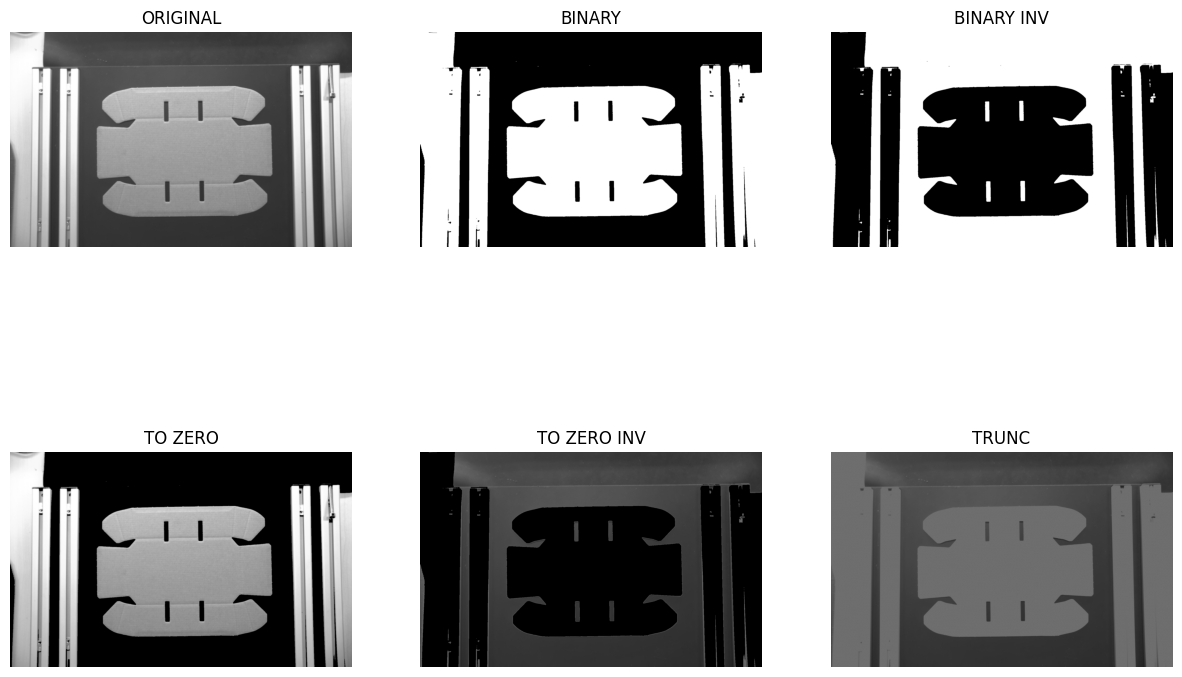

In [83]:
# PLOT IMAGES

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(blurred, cmap="gray", vmin=0, vmax=255)
plt.title("ORIGINAL")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(thBIN, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("BINARY")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(thBININV, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("BINARY INV")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(thTOZERO, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(thTOZEROINV, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO INV")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(thTRUNC, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TRUNC")
plt.axis("off")

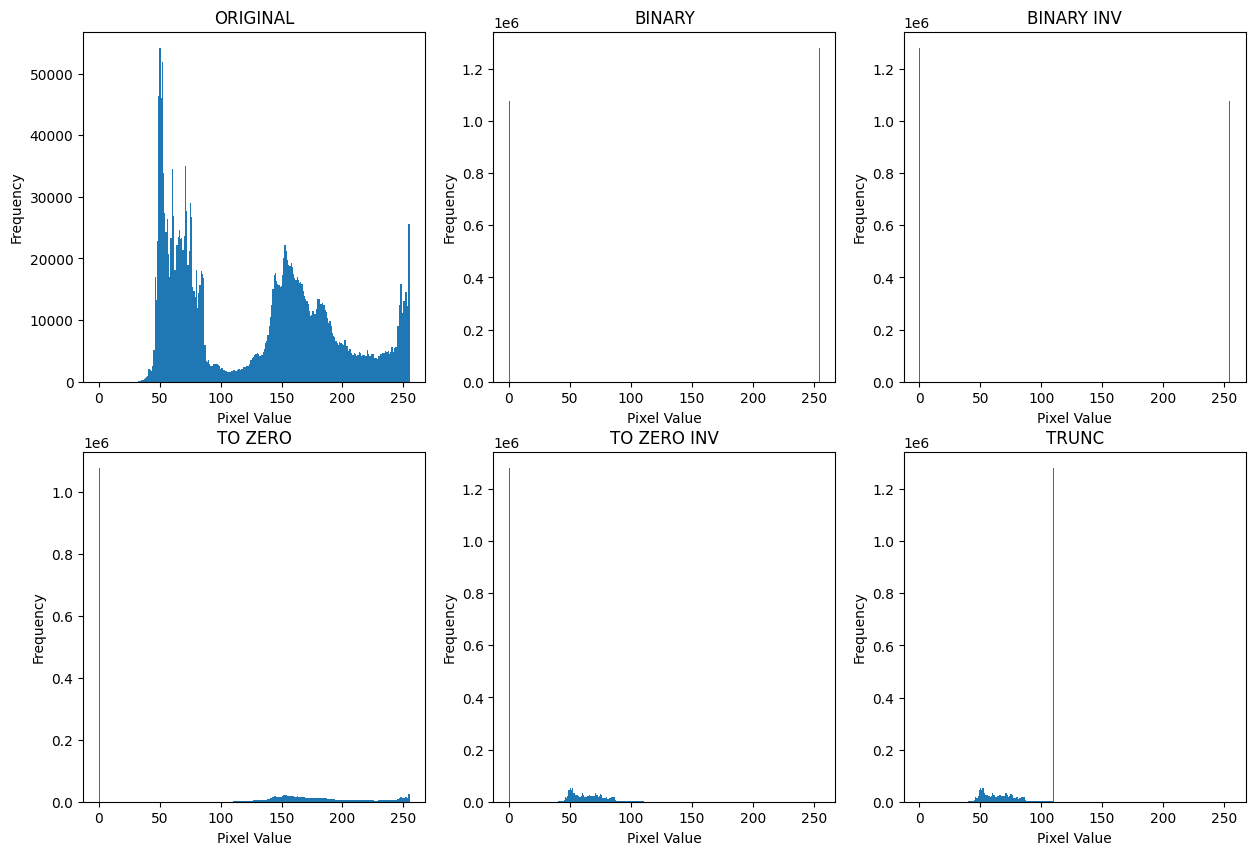

In [84]:
# PLOT HISTOGRAMS

plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

plt.subplot(2,3,1)
plt.hist(blurred.ravel(), bins=256, range=(0, 255))
plt.title("ORIGINAL")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,2)
plt.hist(thBIN.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("BINARY")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,3)
plt.hist(thBININV.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("BINARY INV")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,4)
plt.hist(thTOZERO.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TO ZERO")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,5)
plt.hist(thTOZEROINV.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TO ZERO INV")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,6)
plt.hist(thTRUNC.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TRUNC")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.show()

# Region of interest

(np.float64(-0.5), np.float64(1921.5), np.float64(1201.5), np.float64(-0.5))

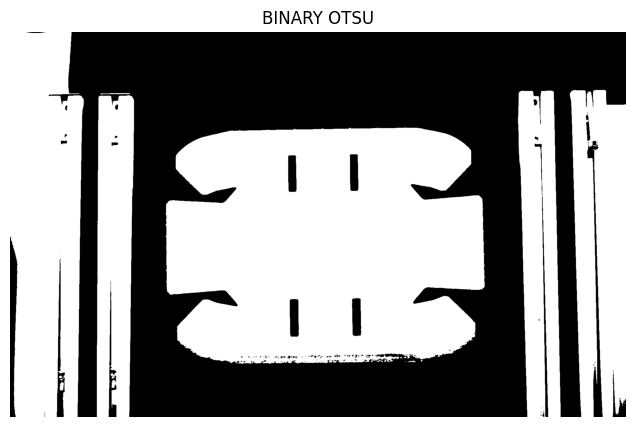

In [85]:
# Thresholding the imnage OTSU gives us the optimal threshold value
_ , th_Bin_OTSU = cv.threshold(udst_crop_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Let's see the results
plt.figure(figsize=(10, 5))
plt.imshow(th_Bin_OTSU, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("BINARY OTSU")
plt.axis("off")

Cardboard area detection

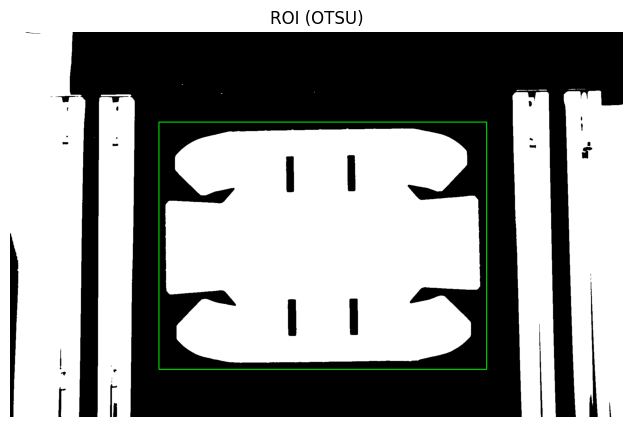

In [86]:
# Find the contours in the image
contours, _ = cv.findContours(thBIN, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# We search the biggest contour Area Based
contour_max = max(contours, key=cv.contourArea)

# Bounding box of the biggest contour
x, y, w, h = cv.boundingRect(contour_max)

# We expand the ROI
margin = 20  # Additional pixels to the ROI
x_roi = max(x - margin, 0)
y_roi = max(y - margin, 0)
w_roi = min(w + 2 * margin, thBIN.shape[1] - x_roi)
h_roi = min(h + 2 * margin, thBIN.shape[0] - y_roi)  #With ROI coordinates we can select the desired part of the image

# Draw a green rectangle using BGR
img_with_roi = cv.cvtColor(thBIN, cv.COLOR_GRAY2BGR)
cv.rectangle(img_with_roi, (x_roi, y_roi), (x_roi + w_roi, y_roi + h_roi), (0, 255, 0), 2)

# We show the image with the ROI detected
plt.figure(figsize=(10, 5))
plt.imshow(img_with_roi)
plt.title("ROI (OTSU)")
plt.axis("off")
plt.show()



Adaptative Threshold

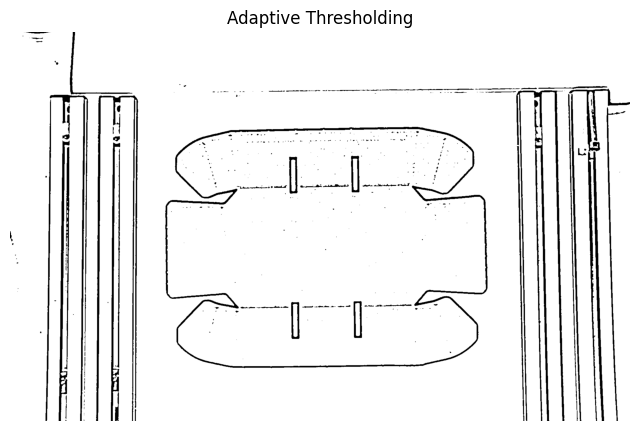

In [87]:
thresh = cv.adaptiveThreshold(
    blurred, 
    maxValue=255,
    adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # o MEAN_C
    thresholdType=cv.THRESH_BINARY,
    blockSize=21,  # debe ser impar y > 1
    C=6  # constante que se resta
)
kernel = np.ones((3, 3), np.uint8)
thresh_clean = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(8, 6))
plt.imshow(thresh_clean, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()

Borders detected: 8929


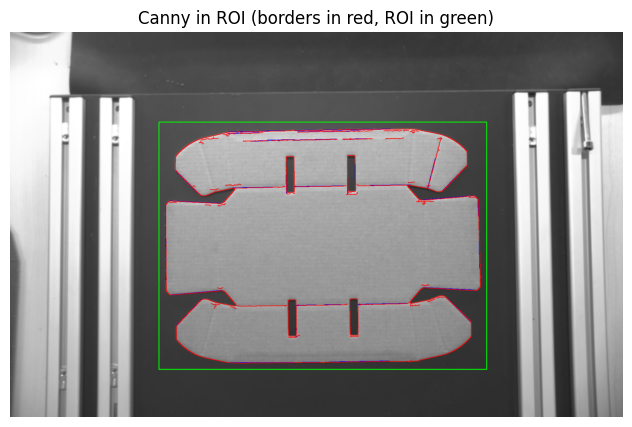

In [93]:
# We use the ROI found in the previous step
roi = blurred[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]

# We apply the canny on the ROI
canny_edges_roi = cv.Canny(roi, 30, 60)
print("Borders detected:", np.count_nonzero(canny_edges_roi))

# Dilate the edges
kernel = np.ones((2, 2), np.uint8)
canny_edges = cv.dilate(canny_edges_roi, kernel, iterations=1)

# we make a color copy of the image
img_copy = blurred.copy()
img_color_copy = cv.cvtColor(img_copy, cv.COLOR_GRAY2BGR)

# We apply HoughLinesP for line detection on the canny edges
lines = cv.HoughLinesP(
    canny_edges_roi,
    rho=1,
    theta=np.pi / 180,
    threshold=80,
    minLineLength=50,
    maxLineGap=10
)

# Obtener ROI de color
roi_color = img_color_copy[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]

# Dibujar las líneas detectadas en rojo
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Ajustar coordenadas al sistema global
        pt1 = (x1 + x_roi, y1 + y_roi)
        pt2 = (x2 + x_roi, y2 + y_roi)
        cv.line(img_color_copy, pt1, pt2, (255, 0, 0), 2)  # blue color (BGR)


# We draw the edges in red on the original image
mask = canny_edges > 0

# We draw the edges in red on the original image
roi_color = img_color_copy[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]
roi_color[mask] = [0, 0, 255] # red (BGR)

# We draw a rectangle of the ROI in green
cv.rectangle(img_color_copy, (x_roi, y_roi), (x_roi + w_roi, y_roi + h_roi), (0, 255, 0), 2)

# The results are shown
plt.figure(figsize=(10, 5))
plt.title("Canny in ROI (borders in red, ROI in green)")
plt.imshow(cv.cvtColor(img_color_copy, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

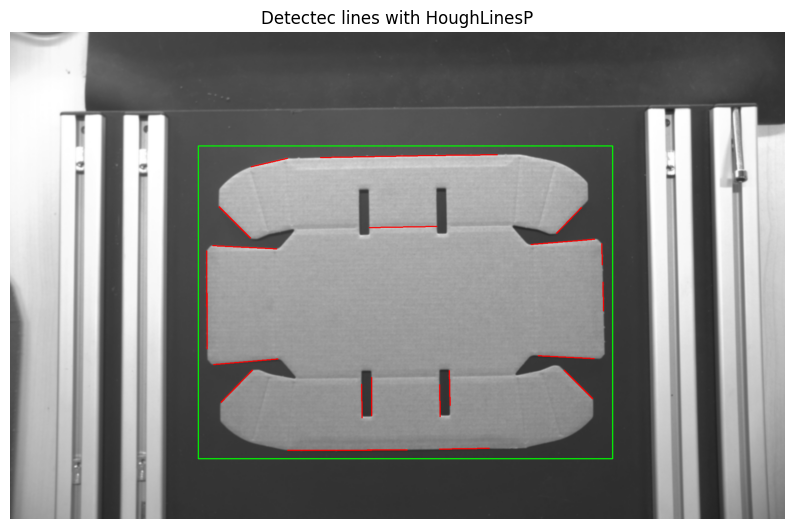

In [89]:
# Obtener ROI de color
roi_color = img_color_copy[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]

# Dibujar las líneas detectadas en rojo
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Ajustar coordenadas al sistema global
        pt1 = (x1 + x_roi, y1 + y_roi)
        pt2 = (x2 + x_roi, y2 + y_roi)
        cv.line(img_color_copy, pt1, pt2, (0, 0, 255), 2)  # rojo

# Show the result
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(img_color_copy, cv.COLOR_BGR2RGB))
plt.title("Detectec lines with HoughLinesP")
plt.axis('off')
plt.show()